### Shortest Path in Weighted undirected graph

In [ ]:
from typing import List
from collections import deque 

class Solution:

## it need path too this code for distances not path. i try to modify

    def shortestPath(self,n:int, m:int, edges:List[List[int]] )->List[int]:
        # code here
        adj = dict()
        # preparing adj list
        for i in range(n):
            adj[i+1] = list()
        
        for u,v,dist in edges:
            adj[u].append([v,dist])
            adj[v].append([u,dist])
        
        parent = [-1]* (n+1)
        
        # make distance array
        dst = [float("inf")]*(n+1)
        dst[1] = 0 # why because it is the start index. Question is in 1 based index
        pq = deque([[0,1]]) #[weight,node] 
        while pq:
            wg,node = pq.popleft()
            for ele,dist in adj[node]:
                if dst[ele] > wg+dist:
                    parent[ele] = node
                    dst[ele] = wg+dist
                    pq.append([dst[ele],ele])
        
        
        if dst[n] == float("inf"):
            return [-1]
        # ofcourse we applied dijkstra algorithm but use 
        # parent here to backtrack the path later on
        
        """
                  index:      1  2  3  4  5
        how tracked example [-1, 1, 4, 1, 3] // 1 based index
        5--3--4--1 this will be path
        
        return should be [path , ...list] == [5,1,4,3,5]
        """
        output = [n]
        curr = n
        while parent[curr] != -1:
            output.append(parent[curr])
            curr = parent[curr]
            # print(output)
        
        
        output.append(dst[n])
        # print(output)
        return output[::-1]
     

### Shortest Distance in a Binary Maze
moving in 1's and only four direction. Using dijkstra algo. 

then here we are not using priority queue ? we use priority queue in dijkstra 

yes. but here we are dealing with constant weight (1) so 

we used general list in python and used pop(0) // instead of this we can use deque for reduction of time complexity

In [ ]:
#User function Template for python3

from typing import List

class Solution:
    
    def shortestPath(self, grid: List[List[int]], source: List[int], destination: List[int]) -> int:
        # code here
        
        n = len(grid)
        m = len(grid[0])
        
        if not 0<=source[0]<n and 0<=source[1]<m and 0<=destination[0]<n and 0<=destination[1]<m:
            return -1
        if destination[0] == source[0] and destination[1] == source[1]:
            return 0
        
        dist = [[float("inf") for _ in range(m)] for _ in range(n)]
        dist[source[0]][source[1]] = 0
        queue = [(0,source[0],source[1])] # [dist, x, y]
        
        def isValid(x,y):
            return 0<=x<n and 0<=y<m and grid[x][y] == 1
            
            
        dst = [[0,-1],[0,1],[1,0],[-1,0]]
        
        
        while queue:
            weight,dx,dy = queue.pop(0)
            for x,y in dst:
                if isValid(x+dx,y+dy):
                    
                    # if we add this check at last we can return -1
                    if  (x+dx) == destination[0] and (y+dy) == destination[1]:
                        return weight+1
                    
                    
                    if dist[x+dx][y+dy] >  weight+1:
                        dist[x+dx][y+dy] = weight+1
                        queue.append((weight+1,x+dx,y+dy))
        
        return -1
        # return -1 if dist[destination[0]][destination[1]] == float("inf") else dist[destination[0]][destination[1]]
        

### 1631. Path With Minimum Effort

In [ ]:
import heapq # priority queue
class Solution(object):
    def minimumEffortPath(self, heights):
        """
        :type heights: List[List[int]]
        :rtype: int
        """
        n = len(heights)
        m = len(heights[0])
        dist = [[float("inf") for _ in range(m)]for _ in range(n)]
        dist[0][0] = 0

        def isValid(i,j):
            return 0<=i<n and 0<=j<m

        queue = [(0,0,0)]
        
        while queue:
            count, x, y = heapq.heappop(queue)
            dst = [[0,-1],[0,1],[1,0],[-1,0]]
            for dx,dy in dst:
                if isValid(x+dx,y+dy):
                    diff = abs(heights[x][y] - heights[x+dx][y+dy])
                    if dist[x+dx][y+dy] == float("inf"):
                        dist[x+dx][y+dy] = max(diff,count)
                        heapq.heappush(queue, (dist[x+dx][y+dy],x+dx,y+dy))
                        continue
                    else:
                        if dist[x+dx][y+dy] > max(diff,count):
                            dist[x+dx][y+dy] = max(diff,count)
                            heapq.heappush(queue, (dist[x+dx][y+dy],x+dx,y+dy))
                           
        return dist[n-1][m-1]
    
    

In [ ]:
import heapq  # priority queue

class Solution(object):
    def minimumEffortPath(self, heights):
        """
        :type heights: List[List[int]]
        :rtype: int
        """
        n = len(heights)
        m = len(heights[0])
        
        # Initialize the distance (effort) matrix with infinity
        dist = [[float("inf")] * m for _ in range(n)]
        dist[0][0] = 0

        def isValid(i, j):
            return 0 <= i < n and 0 <= j < m

        # Min-heap with (effort, x, y)
        queue = [(0, 0, 0)]
        
        # 4-directional movement
        directions = [(0, -1), (0, 1), (1, 0), (-1, 0)]

        while queue:
            effort, x, y = heapq.heappop(queue)

            # If we've reached the bottom-right cell, return the effort
            if x == n - 1 and y == m - 1:
                return effort

            for dx, dy in directions:
                nx, ny = x + dx, y + dy
                if isValid(nx, ny):
                    # Effort to next cell is the max of current path and new edge
                    new_effort = max(effort, abs(heights[x][y] - heights[nx][ny]))
                    if new_effort < dist[nx][ny]:
                        dist[nx][ny] = new_effort
                        heapq.heappush(queue, (new_effort, nx, ny))

        return 0  # Should never reach here if input is valid


### 787. Cheapest Flights Within K Stops
<pre>
here approach is simple just like djkstra
but in dijkstra we give first priority to weigth
here for steps
if cost + adjWeight < dist[adjNode] and stops <= k:
    """this means if we can go next node with in stops and with 
    minimum than previous cost. why strictly less because 
    if equal unnecesary increase of stops"""

    dist[adjNode] = cost + adjWeight

    queue.append((stops+1,adjNode,dist[adjNode]))

    
</pre>

In [ ]:
class Solution(object):
    def findCheapestPrice(self, n, flights, src, dst, k):
        """
        :type n: int
        :type flights: List[List[int]]
        :type src: int
        :type dst: int
        :type k: int
        :rtype: int
        """
        # step 1 make adj list
        
        adj = dict()
        for u,v,cost in flights:
            adj[u] = adj.get(u,list())
            adj[u].append((v,cost))
        
        # step 2 declare distance vector
        dist = [float("inf")]*n
        dist[src] = 0 
        # need a queue <stops, node, dist>
        queue = [(0,src,0)] #  until now 0 stops, current on src, current coverd distance  0 
        
        # iterating loop
        while queue:
            stops, node, cost = queue.pop(0)
            # base condition
            if stops > k: # node should be destination
                continue 
            # interating for adjcent plane which can be possible
            for adjNode,adjWeight in adj.get(node,[]):
                if cost + adjWeight < dist[adjNode] and stops <= k:
                    dist[adjNode] = cost + adjWeight
                    queue.append((stops+1,adjNode,dist[adjNode]))
        
        print(dist,dst)
        if dist[dst] == float("inf"):
            return -1
        return dist[dst]           



### Minimum Multiplications to reach End


![WhatsApp Image 2025-05-22 at 14.36.35_98cb8efb.jpg](<attachment:WhatsApp Image 2025-05-22 at 14.36.35_98cb8efb.jpg>)
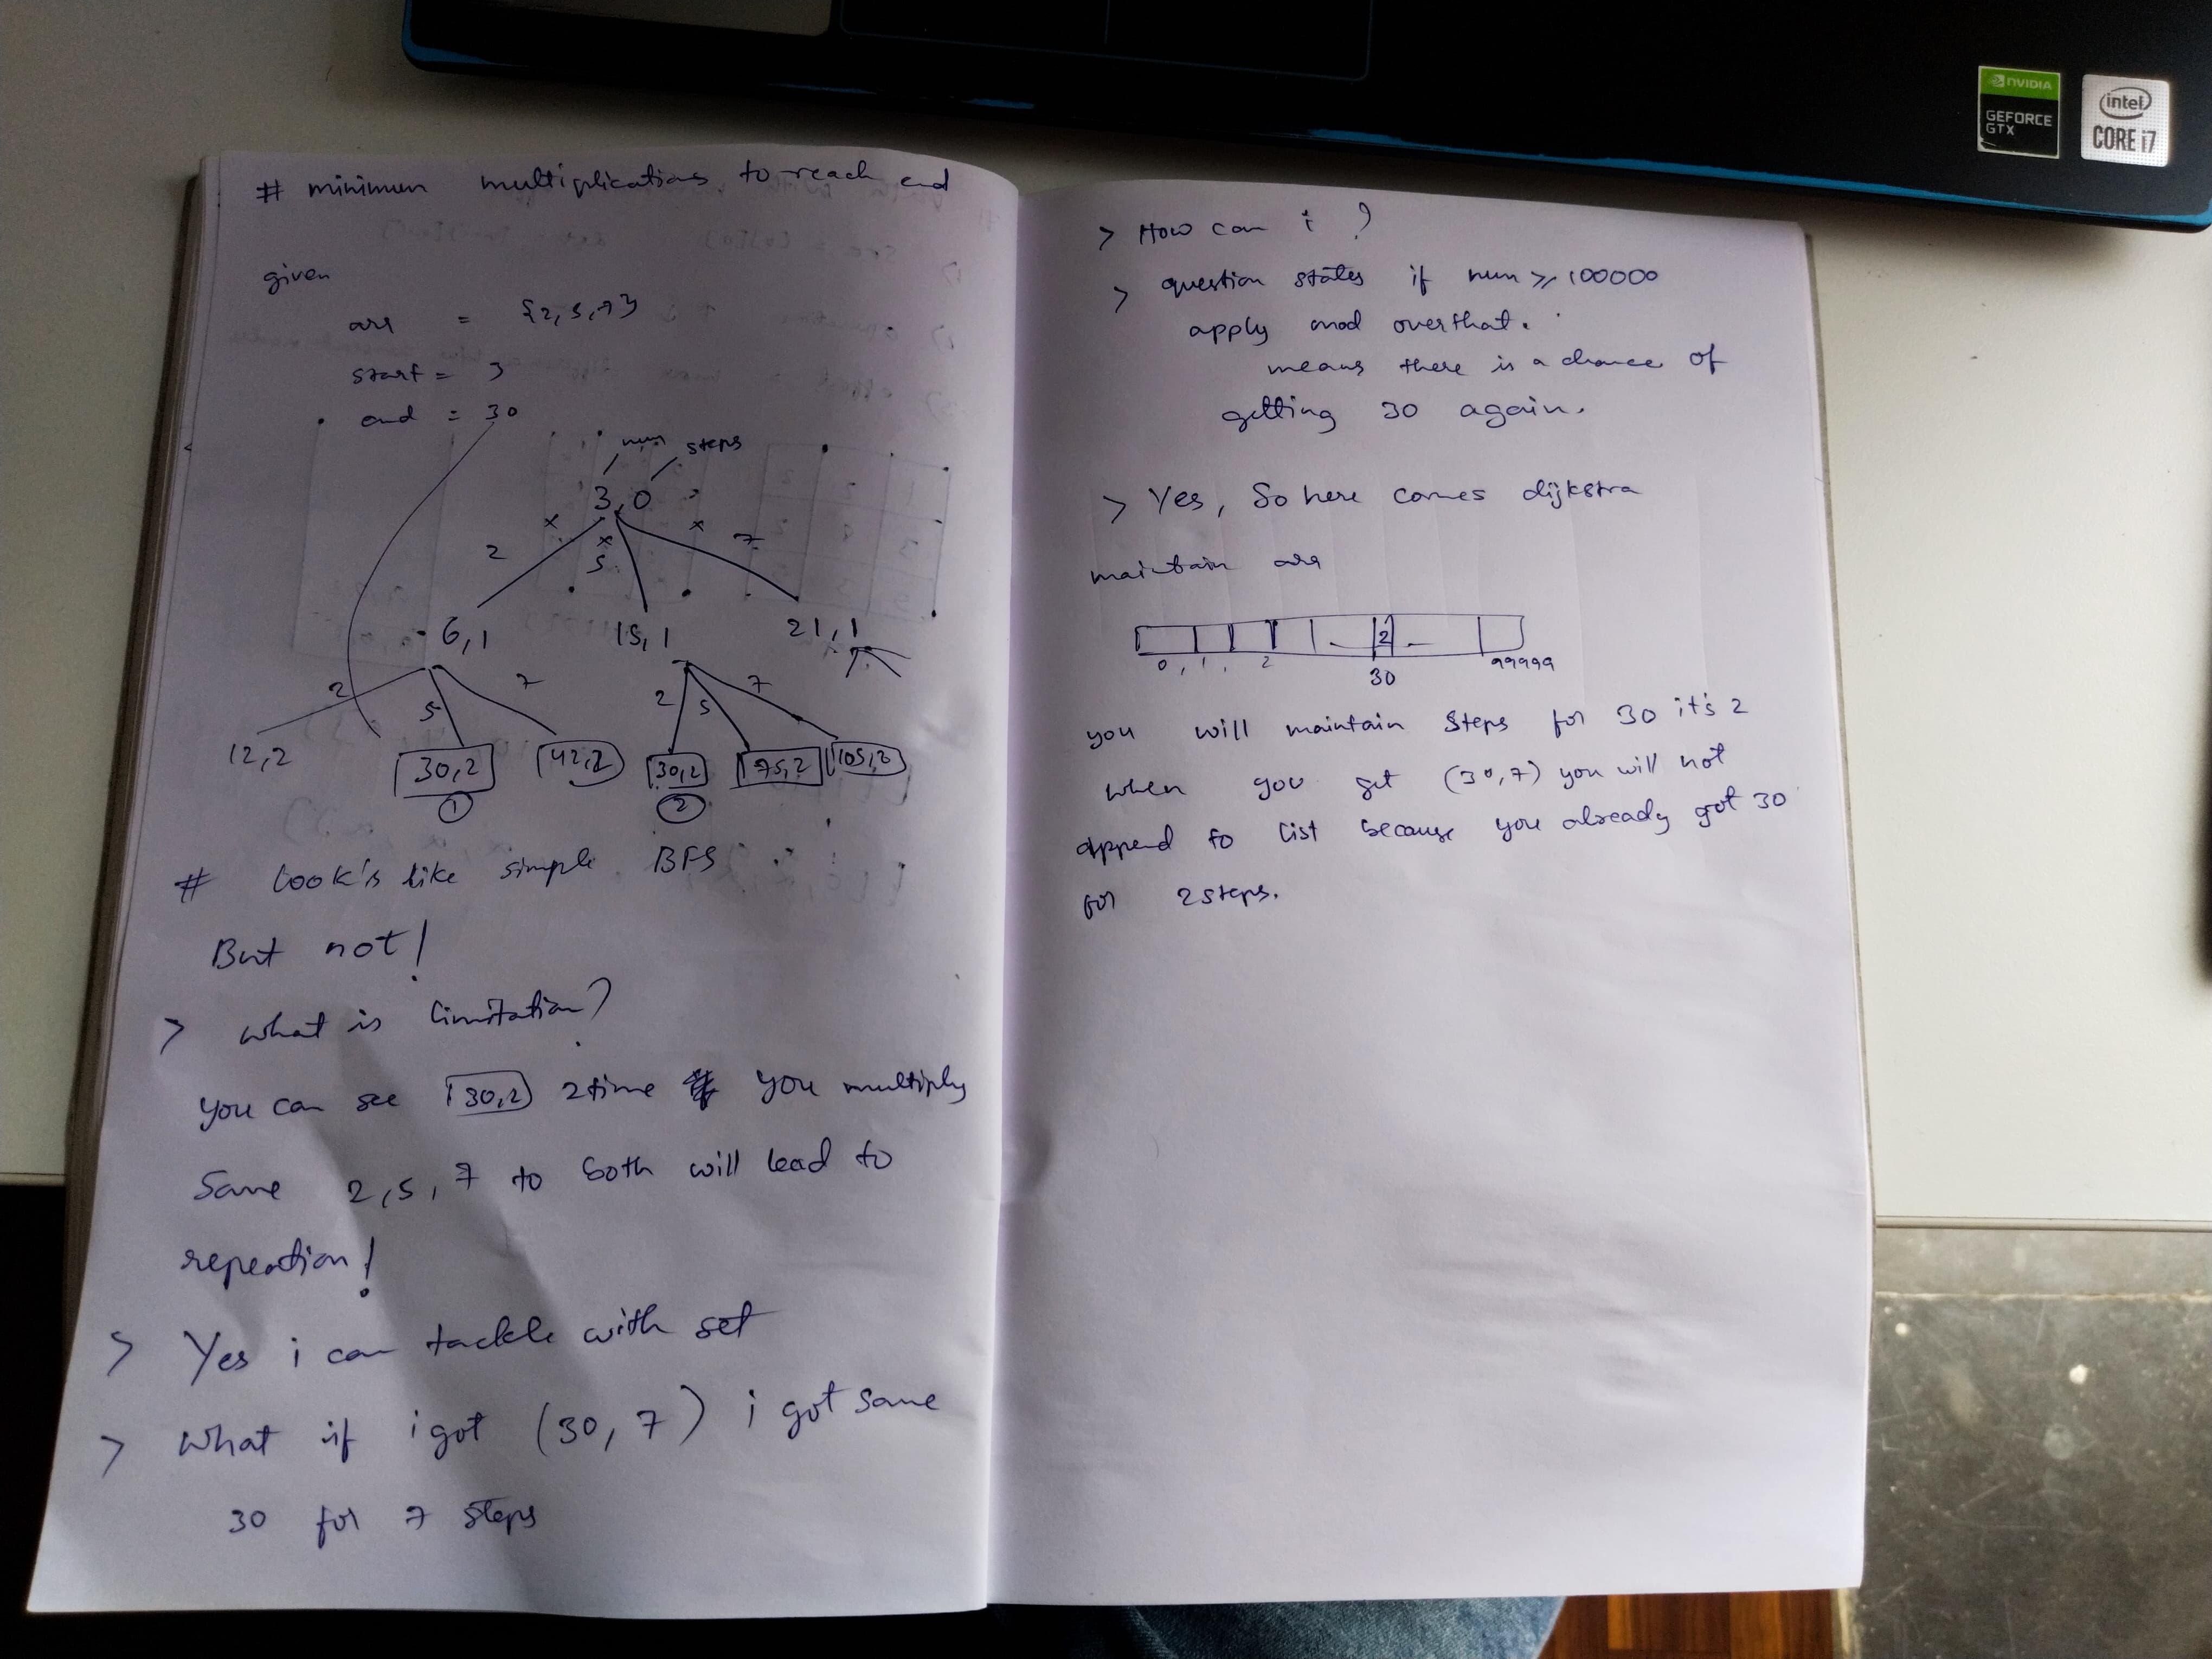

In [ ]:
#User function Template for python3

from typing import List
 
class Solution:
    
    def minimumMultiplications(self, arr : List[int], start : int, end : int) -> int:
        # code here
        if start == end:
            return 0
        min_mul = [float("inf")]*100000 # just like dist 
        mod = 100000
        min_mul[start] = 0
        queue = [(0,start)]
        while queue:
            steps, num = queue.pop(0)
            for i in arr:
                n = (num*i)%mod
                if n == end:
                    return steps+1
                if min_mul[n] > steps+1:
                    min_mul[n] = steps+1
                    queue.append((steps+1,n))
        return -1
        
        

### 1976. Number of Ways to Arrive at Destination
approach



In [1]:
from heapq import heappush as push, heappop as pop

class Solution(object):
    def countPaths(self, n, roads):
        """
        :type n: int
        :type roads: List[List[int]]
        :rtype: int
        """
        # step 0 initalize basic constants
        mod = 10**9 + 7
        # step 1 make adj list
        adj = dict()
        for i in range(n):
            adj[i] = list()
        for u,v,t in roads:
            adj[u].append((v,t))
            adj[v].append((u,t))

        # step 2 make priority queue, distance, ways arrays
        queue = [(0,0)] # (distance,node)
        ways = [0]*n
        dist = [float("inf")]*n
        
        # step 3 base values
        dist[0] = 0
        ways[0] = 1

        # step 4 --> iterating queue:
        while queue:
            wt, node =  pop(queue)
            for adjNode, adj_wt in adj.get(node,[]):
                if adj_wt + wt < dist[adjNode]: # if new small value got
                    dist[adjNode] = adj_wt + wt # update distance
                    ways[adjNode] = ways[node] % mod # update ways : node ways equal to previous(parent) node ways
                    push(queue,(dist[adjNode],adjNode))
                    continue
                if adj_wt+wt == dist[adjNode]:
                    ways[adjNode] = (ways[adjNode] + ways[node]) % mod # update ways : node ways equal to previous(parent) + current node ways
        
        return ways[-1]
